In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os
import re
import copy

In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [15]:
device

device(type='cuda')

# Video Processing

In [17]:
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

In [25]:
def split_video():
    capture = cv2.VideoCapture('fencing.mp4')
    fps = copy.deepcopy(capture.get(cv2.CAP_PROP_FPS))
    height = copy.deepcopy(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
    width = copy.deepcopy(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
    frameNr = 0
    while True:
        success, frame = capture.read()
        if success:
            cv2.imwrite(f'fencing_images/frame_{frameNr}.jpg', frame)
        else:
            break
        frameNr += 1
    capture.release()
    
    images = [img for img in os.listdir('fencing_images')] 
    images.sort(key=natural_keys)
    images = np.array(images)
    
    return images, fps, height, width

In [27]:
images, fps, h, w = split_video()
images = images.to(device)

AttributeError: 'numpy.ndarray' object has no attribute 'to'

In [11]:
def create_video():
    images = [img for img in os.listdir('fencing_images')] 
    images.sort(key=natural_keys)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video = cv2.VideoWriter('fencing_video/complete_video.mp4', fourcc, fps, (int(w), int(h))) 
    for image in images:  
        video.write(cv2.imread('fencing_images/' + image))
    cv2.destroyAllWindows()
    video.release()

In [13]:
create_video()

In [14]:
def remove_frames(directory_path):
    try:
        for file in os.listdir(directory_path):
            file_path = directory_path + '/' + file
            if os.path.isfile(file_path):
                os.remove(file_path)
        print('all files deleted')
    except:
        print('error')

In [16]:
remove_frames('fencing_images')

all files deleted


# Adding Model

In [17]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /home/shawn/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-24 Python-3.11.9 torch-2.4.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5834MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [18]:
%matplotlib inline 
def plot_image(path, index):
    image = cv2.imread(path + images[index])
    results = model(image)
    plt.imshow(np.squeeze(results.render()))
    plt.show()

/home/shawn/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


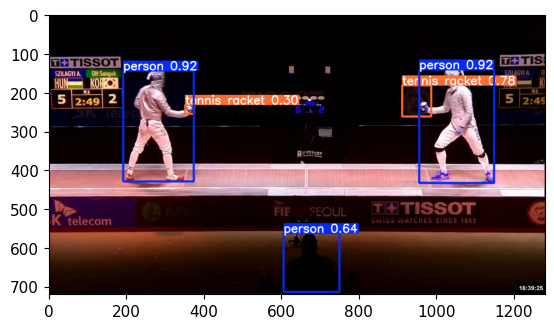

In [21]:
plot_image('fencing_images/', 0)

In [23]:
def create_image_folder():
    return [cv2.imread('fencing_images/' + img) for img in images]

In [25]:
all_images = create_image_folder()

In [3]:
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:1000"
x = torch.randn(1000, 1000).cuda()
y = x + x.t()
z = torch.matmul(y, y)
#os.environ["PYTORCH_CUDA_ALLOC_CONF"] = ""

In [45]:


all_results = model(all_images, size=(int(h),int(w)))
all_results.save()

OutOfMemoryError: CUDA out of memory. Tried to allocate 2.54 GiB. GPU 0 has a total capacity of 5.70 GiB of which 2.31 GiB is free. Including non-PyTorch memory, this process has 3.36 GiB memory in use. Of the allocated memory 3.22 GiB is allocated by PyTorch, and 8.06 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [70]:
torch.cuda.memory_summary(device=None, abbreviated=False)
model.cuda().half()

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [42]:
results = model(cv2.imread('fencing_images/' + images[0]), size=(int(h),int(w)))
results.save()

/home/shawn/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
Saved 1 image to runs/detect/exp6


In [40]:
results.ims

[array([[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 5,  0,  1],
         [ 5,  0,  1],
         [ 5,  0,  1]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 5,  0,  1],
         [ 5,  0,  1],
         [ 5,  0,  1]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 5,  0,  1],
         [ 5,  0,  1],
         [ 5,  0,  1]],
 
        ...,
 
        [[13,  1,  0],
         [13,  1,  0],
         [13,  1,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[17,  8,  5],
         [17,  8,  5],
         [19,  7,  5],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[29, 20, 17],
         [29, 20, 17],
         [31, 19, 17],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]]], dtype=uint8)]

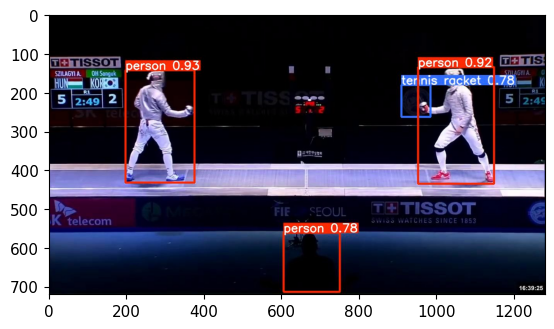

In [48]:
%matplotlib inline 
img = cv2.imread('runs/detect/exp/image0.jpg')
plt.imshow(img)
plt.show()